kaggle is not a personal computer environment, so it is often inconvenient for libraries or settings.

I was uncomfortable with matplotlib animation, and I'll show you how to do it with the animation visualization you want.

In [1]:
# default library for data handling
import numpy as np 
import pandas as pd 

# matplotlib series
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation

# HTML 
from IPython.display import HTML

Most of the examples convert to `mp4`. 

However, if you run the example code in the Kaggle notebook, you will get an error.

The reason for this is as follows :

In [2]:
print(animation.writers.list())

['pillow', 'imagemagick', 'imagemagick_file', 'html']


The animation writer needs `ffmpeg` to run mp4.

To install it, you have to install it with conda or brew, but you can't run it.

Then you need to create an animation with the above writer.

After trying that, I found that `gif`s can be created with `pillow`, `imagemagick`.

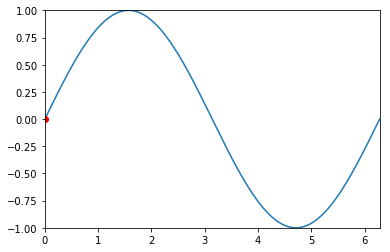

In [3]:
TWOPI = 2*np.pi

fig, ax = plt.subplots(1, 1)

t = np.arange(0.0, TWOPI, 0.001)
s = np.sin(t)
l = plt.plot(t, s)

ax = plt.axis([0,TWOPI,-1,1])

redDot, = plt.plot([0], [np.sin(0)], 'ro')

def animate(i):
    redDot.set_data(i, np.sin(i))
    return redDot,

myAnimation = animation.FuncAnimation(fig, animate, 
                                      frames=np.arange(0.0, TWOPI, 0.1), 
                                      interval=10, blit=True, 
                                      repeat=False)

plt.show()

We wanted **the video**, but the `gif` doesn't look right in the notebook environment.

For that reason, I decided that it would be better to save and call first.

In [4]:
%time myAnimation.save('myAnimation1.gif', writer='imagemagick', fps=30)

%time myAnimation.save('myAnimation2.gif', writer='pillow', fps=30)

CPU times: user 6.42 s, sys: 7.04 s, total: 13.5 s
Wall time: 12.2 s
CPU times: user 7.32 s, sys: 7.22 s, total: 14.5 s
Wall time: 5.29 s


Now you can call each one the way you prefer.

Importing from HTML into python code or hyperlinking from markdown cells.


**writer as imagemagick**

> markdwon : `![](./myAnimation1.gif)`

![](./myAnimation1.gif)

**writer as pillow**

`pillow` seems to have failed.

> markdwon : `![](./myAnimation2.gif)`

![](./myAnimation2.gif)



**Python code**

In [5]:
HTML('<img src="./myAnimation1.gif" />')

If you don't want to draw the ambiguous plot above, you can do it with `plt.close (fig)` instead of `plt.show()`.

In the next article, I will prepare a more detailed tutorial. 

**Thank you.**

## Reference

- [Basic animation with FuncAnimation](https://riptutorial.com/matplotlib/example/23558/basic-animation-with-funcanimation)

### Useful Link

- [Matplotlib Animation Tutorial](https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/)

- [Animations with Matplotlib
](https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c)